In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats

In [2]:
df = pd.read_csv('my_dataframe.csv')
df = df.drop(columns=['Unnamed: 0'])
len(df.columns)

33

In [3]:
len(df.columns)

33

In [4]:
df.corr()['C150_4_POOLED'].sort_values()

INC_PCT_LO            -0.652497
CDR3                  -0.627107
CDR2                  -0.598778
FTFTPCTPELL           -0.593015
UG25ABV               -0.564922
DEP_STAT_PCT_IND      -0.550656
INC_PCT_M1            -0.482295
ADM_RATE              -0.355987
POVERTY_RATE          -0.348215
REGION                -0.179319
CONTROL               -0.117852
INC_PCT_M2             0.172434
PFTFAC                 0.237818
TUITFTE                0.338561
OPENADMP               0.381871
DEBT_MDN               0.409814
INC_PCT_H1             0.469297
INEXPFTE               0.488471
MEDIAN_HH_INC          0.550768
TUITIONFEE_IN          0.572610
AVGFACSAL              0.593928
COSTT4_A               0.608755
TUITIONFEE_OUT         0.697612
INC_PCT_H2             0.765626
C150_4_NOLOANNOPELL    0.795283
SAT_AVG                0.825884
ACTCMMID               0.834112
C100_4_POOLED          0.876786
C150_4_POOLED          1.000000
Name: C150_4_POOLED, dtype: float64

In [5]:
df1 = df[['C150_4_POOLED','ACTCMMID','SAT_AVG','C150_4_NOLOANNOPELL','INC_PCT_H2','TUITIONFEE_OUT','COSTT4_A',
              'AVGFACSAL','TUITIONFEE_IN','MEDIAN_HH_INC','INEXPFTE','INC_PCT_H1','DEBT_MDN','INC_PCT_LO',
              'CDR3','CDR2','FTFTPCTPELL','UG25ABV','DEP_STAT_PCT_IND','INC_PCT_M1','ADM_RATE','POVERTY_RATE']]
len(df1.columns)

22

In [6]:
df1.corr()['C150_4_POOLED']

C150_4_POOLED          1.000000
ACTCMMID               0.834112
SAT_AVG                0.825884
C150_4_NOLOANNOPELL    0.795283
INC_PCT_H2             0.765626
TUITIONFEE_OUT         0.697612
COSTT4_A               0.608755
AVGFACSAL              0.593928
TUITIONFEE_IN          0.572610
MEDIAN_HH_INC          0.550768
INEXPFTE               0.488471
INC_PCT_H1             0.469297
DEBT_MDN               0.409814
INC_PCT_LO            -0.652497
CDR3                  -0.627107
CDR2                  -0.598778
FTFTPCTPELL           -0.593015
UG25ABV               -0.564922
DEP_STAT_PCT_IND      -0.550656
INC_PCT_M1            -0.482295
ADM_RATE              -0.355987
POVERTY_RATE          -0.348215
Name: C150_4_POOLED, dtype: float64

## Visualizations

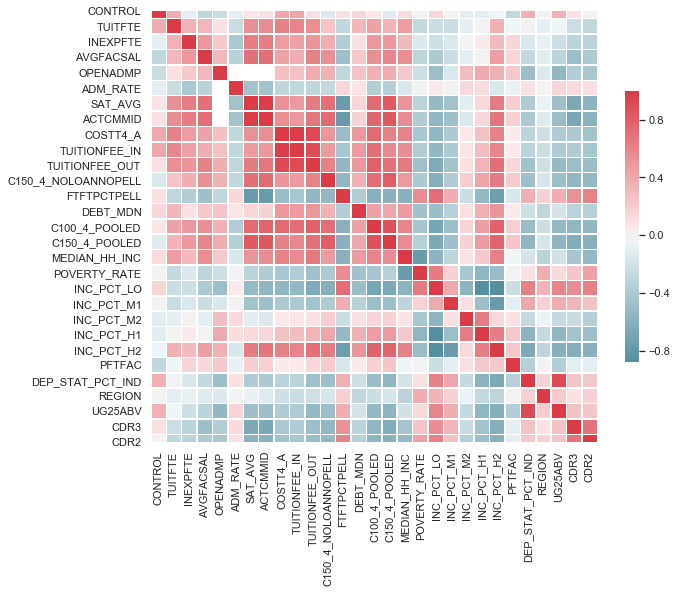

In [7]:
# heatmap 1
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

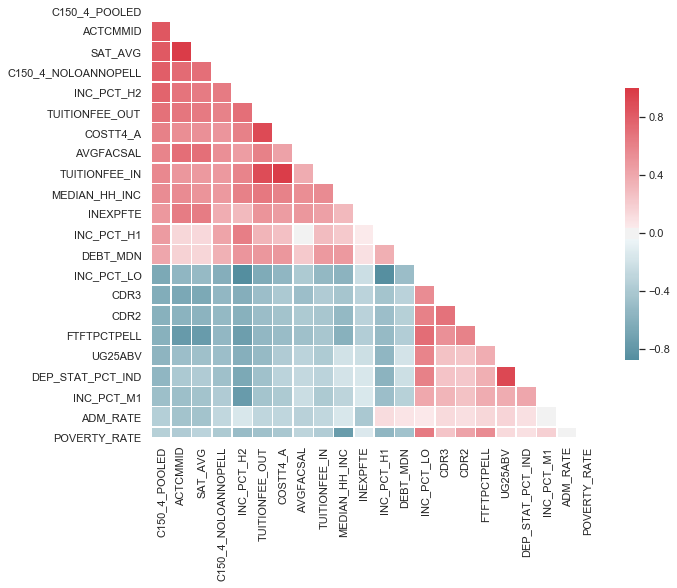

In [8]:
# heatmap 2
sns.set(style="white")

# Compute the correlation matrix
corr1 = df1.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr1, mask=mask,cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

plt.savefig('heatmap.png')

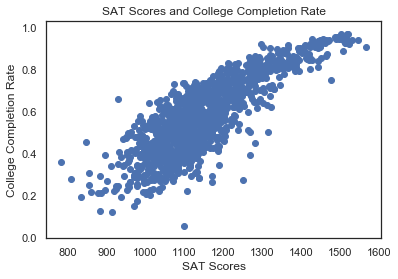

In [9]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('SAT Scores and College Completion Rate')
ax.set_xlabel('SAT Scores')
ax.set_ylabel('College Completion Rate')
x = df['SAT_AVG']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.savefig('SAT_scatterplot.png')

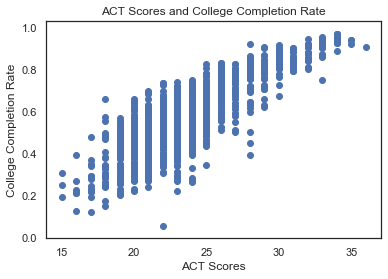

In [10]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('ACT Scores and College Completion Rate')
ax.set_xlabel('ACT Scores')
ax.set_ylabel('College Completion Rate')
x = df['ACTCMMID']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.savefig('ACT_scatterplot.png')

In [11]:
# ACT low, mid & high 
act_low = df1[df1['ACTCMMID'] < 18.5]
act_mid = df1[df1['ACTCMMID'] <= 22.5]
act_high = df1[df1['ACTCMMID'] > 22.5]

# SAT low, mid & high 
sat_low = df1[df1['SAT_AVG'] < 900]
sat_mid = df1[df1['SAT_AVG'] <= 1200]
sat_high = df1[df1['SAT_AVG'] > 1200]

In [12]:
act_low.columns

Index(['C150_4_POOLED', 'ACTCMMID', 'SAT_AVG', 'C150_4_NOLOANNOPELL',
       'INC_PCT_H2', 'TUITIONFEE_OUT', 'COSTT4_A', 'AVGFACSAL',
       'TUITIONFEE_IN', 'MEDIAN_HH_INC', 'INEXPFTE', 'INC_PCT_H1', 'DEBT_MDN',
       'INC_PCT_LO', 'CDR3', 'CDR2', 'FTFTPCTPELL', 'UG25ABV',
       'DEP_STAT_PCT_IND', 'INC_PCT_M1', 'ADM_RATE', 'POVERTY_RATE'],
      dtype='object')

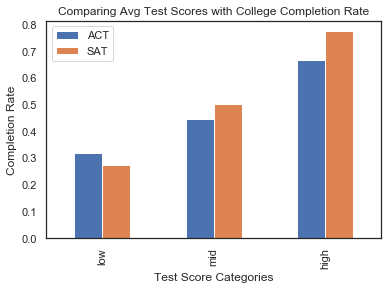

In [13]:
low_values = [act_low['C150_4_POOLED'].mean(),sat_low['C150_4_POOLED'].mean()]
mid_values = [act_mid['C150_4_POOLED'].mean(),sat_mid['C150_4_POOLED'].mean()]
high_values = [act_high['C150_4_POOLED'].mean(),sat_high['C150_4_POOLED'].mean()]
labels = ['ACT','SAT']

df_low = pd.DataFrame(low_values,index=labels)
df_mid = pd.DataFrame(mid_values,index=labels)
df_high = pd.DataFrame(high_values,index=labels)

df_bar = pd.concat([df_low.T, df_mid.T, df_high.T], axis=0, ignore_index=False)
df_bar.reset_index(inplace = True)
labels = ['low','mid','high']
df_bar['Test Scores'] = labels

ax = df_bar.plot(x='Test Scores', y=['ACT','SAT'], kind="bar");
ax.set_title('Comparing Avg Test Scores with College Completion Rate')
ax.set_ylabel('Completion Rate')
ax.set_xlabel('Test Score Categories')
plt.savefig('testscores_barchart.png')

In [14]:
# dropping 0 because there are only 5 schools in that category 
df['REGION'].replace(0,np.nan,inplace=True)

In [15]:
df['REGION'].value_counts()

5.0    482
2.0    399
3.0    295
8.0    230
4.0    210
1.0    164
6.0    161
7.0     61
9.0     51
Name: REGION, dtype: int64

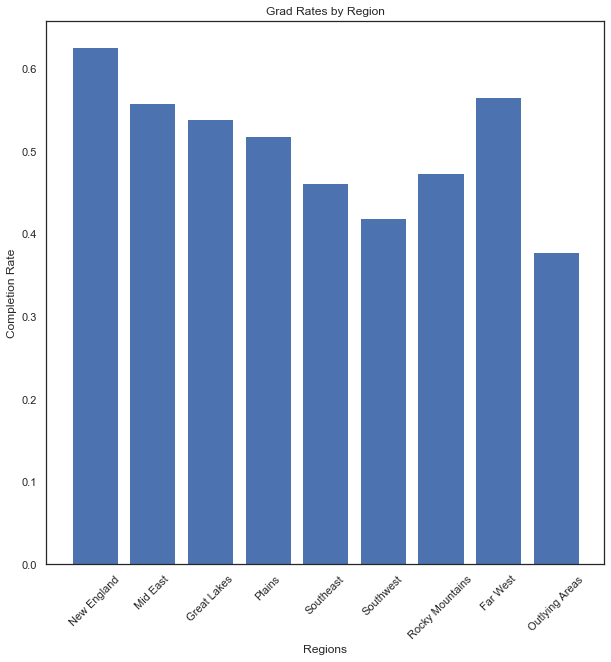

In [16]:
# bar chart of grad rates by region 
regional_grad_rates = df.groupby('REGION')['C150_4_POOLED'].mean()
regions = ['New England','Mid East','Great Lakes','Plains','Southeast','Southwest','Rocky Mountains','Far West','Outlying Areas']

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(regions, regional_grad_rates)
plt.xticks(rotation=45)
ax.set_title('Grad Rates by Region')
ax.set_xlabel('Regions')
ax.set_ylabel('Completion Rate')
plt.show()

## Hypothesis Testing

#### 1. comparing grad rate means for low, mid and high scoring schools (ACT)

##### ANOVA 
H0: there is no significant difference in grad rates for low, mid & high scoring schools

Ha: there is a significant difference in grad rates for low, mid & high scoring schools 

In [18]:
df_act = df1[['C150_4_POOLED','ACTCMMID']]
df_act.dropna(inplace=True)
df_act

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,C150_4_POOLED,ACTCMMID
0,0.2533,18.0
1,0.5567,25.0
3,0.5020,28.0
4,0.2901,18.0
5,0.6998,27.0
...,...,...
2010,0.4255,24.0
2011,0.6693,25.0
2019,0.5491,20.0
2032,0.3443,18.0


In [19]:
stats.f_oneway(df_act['C150_4_POOLED'][df_act['ACTCMMID'] < 18.5],
               df_act['C150_4_POOLED'][df_act['ACTCMMID'] <= 22.5],
               df_act['C150_4_POOLED'][df_act['ACTCMMID'] > 22.5])

F_onewayResult(statistic=487.6369484916427, pvalue=4.8244965122291765e-158)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

#### 2. comparing grad rate means for low, mid and high scoring schools (SAT)

##### ANOVA
H0: there is no significant difference in grad rates for low, mid & high scoring schools

Ha: there is a significant difference in grad rates for low, mid & high scoring schools 

In [21]:
df_sat = df1[['C150_4_POOLED','SAT_AVG']]
df_sat.dropna(inplace=True)
df_sat.describe()

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,C150_4_POOLED,SAT_AVG
count,1250.000000,1250.00000
mean,0.573217,1145.38720
std,0.173309,124.14017
min,0.059600,785.00000
25%,0.452800,1062.00000
50%,0.562650,1126.00000
75%,0.690250,1202.75000
max,0.970800,1566.00000


In [22]:
stats.f_oneway(df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] < 1062],
               df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] <= 1203],
               df_sat['C150_4_POOLED'][df_sat['SAT_AVG'] > 1203])

F_onewayResult(statistic=796.9058967927167, pvalue=4.729311532101925e-239)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

#### 3. comparing grad rates by instructional expenditure 

##### ANOVA

In [23]:
df_inexp = df[['INEXPFTE','C150_4_POOLED']]
df_inexp.dropna(inplace=True)
df_inexp.describe()

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,INEXPFTE,C150_4_POOLED
count,1908.000000,1908.000000
mean,10495.101153,0.518249
std,9079.298053,0.204327
min,454.000000,0.000000
25%,6027.000000,0.380375
50%,8532.000000,0.519650
75%,12107.250000,0.659850
max,127669.000000,1.000000


In [24]:
stats.f_oneway(df_inexp['C150_4_POOLED'][df_inexp['INEXPFTE'] < 6027],
               df_inexp['C150_4_POOLED'][df_inexp['INEXPFTE'] <= 12107],
               df_inexp['C150_4_POOLED'][df_inexp['INEXPFTE'] > 12107])

F_onewayResult(statistic=399.69385537495515, pvalue=2.095381989499582e-150)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

In [25]:
# barchart of comparing instructional expenditures with grad rates
inexp_low = df_inexp[df_inexp['INEXPFTE'] < 6027]
inexp_mid = df_inexp[df_inexp['INEXPFTE'] <= 12107]
inexp_high = df_inexp[df_inexp['INEXPFTE'] > 12107]

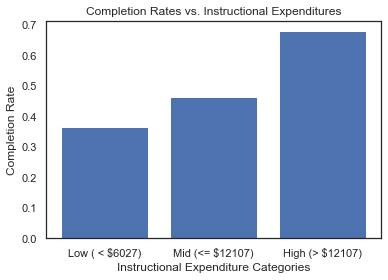

In [26]:
x_vals = ['Low ( < $6027)','Mid (<= $12107)','High (> $12107)']
y_vals = [inexp_low['C150_4_POOLED'].mean(),inexp_mid['C150_4_POOLED'].mean(),inexp_high['C150_4_POOLED'].mean()]

fig, ax = plt.subplots()
ax.bar(x_vals, y_vals)
ax.set_ylabel('Completion Rate')
ax.set_xlabel('Instructional Expenditure Categories')
ax.set_title("Completion Rates vs. Instructional Expenditures");

plt.savefig('inexp_barchart.png')

#### 4. comparing grad rates by median household income

In [27]:
df_hhinc = df1[['C150_4_POOLED','MEDIAN_HH_INC']]
df_hhinc.dropna(inplace=True)
df_hhinc.describe()

/Users/laurencunningham/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,C150_4_POOLED,MEDIAN_HH_INC
count,1736.000000,1736.000000
mean,0.534965,62596.637039
std,0.195306,12725.398897
min,0.000000,17277.840000
25%,0.402075,55584.415000
50%,0.535200,62798.505000
75%,0.670325,71505.240000
max,1.000000,96737.950000


In [29]:
stats.f_oneway(df_hhinc['C150_4_POOLED'][df_hhinc['MEDIAN_HH_INC'] < 55584],
               df_hhinc['C150_4_POOLED'][df_hhinc['MEDIAN_HH_INC'] <= 71505],
               df_hhinc['C150_4_POOLED'][df_hhinc['MEDIAN_HH_INC'] > 71505])

F_onewayResult(statistic=394.05572207033185, pvalue=1.0872990430128435e-146)

##### result is significant with very low p-value...so we can reject the null that the means are equal for these groups

In [32]:
# barchart of comparing instructional expenditures with grad rates
inc_low = df_hhinc[df_hhinc['MEDIAN_HH_INC'] < 55584]
inc_mid = df_hhinc[df_hhinc['MEDIAN_HH_INC'] <= 71505]
inc_high = df_hhinc[df_hhinc['MEDIAN_HH_INC'] > 71505]

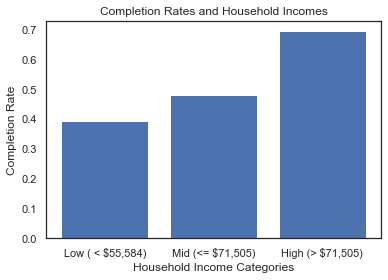

In [33]:
x_vals = ['Low ( < $55,584)','Mid (<= $71,505)','High (> $71,505)']
y_vals = [inc_low['C150_4_POOLED'].mean(),inc_mid['C150_4_POOLED'].mean(),inc_high['C150_4_POOLED'].mean()]

fig, ax = plt.subplots()
ax.bar(x_vals, y_vals)
ax.set_ylabel('Completion Rate')
ax.set_xlabel('Household Income Categories')
ax.set_title("Completion Rates and Household Incomes");

plt.savefig('hhinc_barchart.png')